<a href="https://colab.research.google.com/github/oenereaty/MP2024/blob/main/MP2024_wk8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import 및 설치

In [1]:
!pip install git+https://github.com/guebin/mp2024pkg.git

  Cloning https://github.com/guebin/mp2024pkg.git to /tmp/pip-req-build-kpvsj482
  Running command git clone --filter=blob:none --quiet https://github.com/guebin/mp2024pkg.git /tmp/pip-req-build-kpvsj482
  Resolved https://github.com/guebin/mp2024pkg.git to commit a4fe1b53001396307c793830b1fcb371a92c55ca
  Preparing metadata (setup.py) ... done
  Created wheel for mp2024pkg: filename=mp2024pkg-1.0-py3-none-any.whl size=3361 sha256=85b055e7863f3d3c40c46d3e901ff0425a192347a5e746c675ec522ac99426b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-6wxa3vo9/wheels/34/e6/bd/d7e7b36b46f974e90ffd4f6308065d303cde840f9c0e0b0892
Successfully built mp2024pkg


In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import numpy as np
import torch
import mp2024pkg
import transformers
import datasets
import matplotlib.pyplot as plt

# np 와 torch 의 비교

## np와 torch의 공통점

`torch.tensor` 의 형태 변환

In [4]:
tsr1 = torch.tensor([1,2,3])
print(
    f"텐서값 = {tsr1}\n"
    f"shape = {tsr1.shape}" # len 과 같은 기능을 수행하는 `shape`. 요소가 3개!
)

텐서값 = tensor([1, 2, 3])
shape = torch.Size([3])


In [5]:
tsr2 = tsr1.reshape(3,1)
print(
    f"텐서값 = {tsr2}\n"
    f"shape = {tsr2.shape}" # 3x1 의 형태 (3행, 1열. 세로로 길게)
)

텐서값 = tensor([[1],
        [2],
        [3]])
shape = torch.Size([3, 1])


In [6]:
tsr3 = tsr1.reshape(1,3)
print(
    f"텐서값 = {tsr3}\n"
    f"shape = {tsr3.shape}" # 1x3 의 형태 (1행, 3열. 가로로 길게 / list가 중첩 구조라서 1행으로 표시할 수 있는 것임)
)

텐서값 = tensor([[1, 2, 3]])
shape = torch.Size([1, 3])


`np.array` 에서의 형태 변환

In [7]:
arr1 = np.array([1,2,3])
arr2 = np.array([2,3,4])

In [8]:
np.stack([arr1,arr2],axis=0) # 가로로 쌓는다

array([[1, 2, 3],
       [2, 3, 4]])

In [9]:
np.stack([arr1,arr2],axis=1) # 세로로 쌓는다

array([[1, 2],
       [2, 3],
       [3, 4]])

## np와 torch의 차이점

### 기본 자료형

In [10]:
a = np.array(1/3)
a, a.dtype

(array(0.33333333), dtype('float64'))

$⇑$ numpy 버전

In [11]:
a = torch.tensor(1/3)
a, a.dtype

(tensor(0.3333), torch.float32)

$⇑$ torch 버전

메모리 측면에서 torch 버전이 더 유리하다.

하지만 `numpy`보다 덜 정확함

그러나 `torch`도 `float64`로 저장할 수는 있음

In [12]:
a = torch.tensor(1/3,dtype=torch.float64)
a, a.dtype

(tensor(0.3333, dtype=torch.float64), torch.float64)

In [13]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333333333333
dtype: torch.float64


기분 나쁜(...?) 꼬리표가 붙을 수 있음

하지만 `float32`로 저장하는 것이 모델 생성에 용이하므로, `float32`로 변환하는 것을 습관화하자!

In [14]:
a = np.array(1/3)
tsr = torch.tensor(a)
tsr

tensor(0.3333, dtype=torch.float64)

In [15]:
tsr.float() # float32로 바꾸는방법1

tensor(0.3333)

$⇑$  다만, 이 메서드는 원본 텐서를 직접 변경하지 않고, 새로운 float32 형식의 텐서를 반환함.

원본 tsr은 여전히 float64로 남아 있음

In [16]:
우와 = tsr.to(torch.float32) # 바꾸는방법2

In [17]:
우와.dtype

torch.float32

In [18]:
arr = np.array(1/3,dtype=np.float32)
arr

array(0.33333334, dtype=float32)

In [19]:
arr.astype(np.float64) # 기존의 `arr`를 float64로 바꾸는 방법

array(0.33333334)

In [20]:
a = torch.tensor([1,0,1])
a, a.float() # float32로 변환

(tensor([1, 0, 1]), tensor([1., 0., 1.]))

In [21]:
a = torch.tensor([1,0,1])
a, a.bool()

(tensor([1, 0, 1]), tensor([ True, False,  True]))

In [22]:
a = torch.tensor([1.0,0,1])
a, a.long() # int64의 형태로 변환. long은 int64가 기본임

(tensor([1., 0., 1.]), tensor([1, 0, 1]))

### 메소드 차이

In [23]:
tsr = torch.tensor([1,2,3])
tsr

tensor([1, 2, 3])

In [24]:
tsr.numpy() # np.array로 바꿔주는 메소드

array([1, 2, 3])

In [25]:
tsr.float() # 자료형을 float으로 바꿔주는 메소드

            # arr.float()는 불가하다

tensor([1., 2., 3.])

### 미분 연산 지원

f(x) = x^2

f'(x) = 2x

f'(2) = 4

$\downarrow$ 파이썬을 기본문법을 이용한 미분

In [26]:
def f(x):
    return x**2

In [27]:
a = 2
h = 0.001
(f(a+h)-f(a))/h

4.000999999999699

$\downarrow$ torch를 이용한 미분



In [28]:
def f(x):
    return x**2

a = torch.tensor(2.0, requires_grad=True)  # 변수 a를 정의하고 기울기 계산을 허용
b = f(a)  # f(a) = a^2 계산, b는 a^2의 결과
b.backward()  # b의 값(스칼라)을 기준으로 a에 대한 기울기 계산(=미분 하세요)
a.grad  # a에 대한 기울기 값 출력


tensor(4.)

In [29]:
a = torch.tensor(3.0, requires_grad=True)
a # 토치텐서... 그런데 이제 미분꼬리표를 곁들인..

tensor(3., requires_grad=True)

In [30]:
print(a.grad) # a에서의 기울기. 지금은 아무것도 없다

None


In [31]:
b = f(a) # b=a**2
b # 여기에도 꼬리표 같은 게 붙어 있음..

tensor(9., grad_fn=<PowBackward0>)

In [32]:
c = 2*b # c = 2*a**2
c # 여기에도 꼬리표 같은 게 붙어 있음..

tensor(18., grad_fn=<MulBackward0>)

In [33]:
c.backward() # c=2b=2a**2 를 미분하세요... 뭐로??? 미분꼬리표의 근원인 a로!

따라서 `backward` 함수를 사용할 땐 꼭 **미분꼬리표**가 있어야 함!

여기서는 `a`부터 꼬리표가 생겼기 때문에, a부터 차례대로 실행해야 함.

a때문에 b가 꼬리표가 생겼고, b 때문에 c가 꼬리표가 생겼으며, c가 꼬리표가 생겼기에 `backward` 함수 실행 가능!

In [34]:
a,a.grad # a값과 a에서의 기울기

(tensor(3., requires_grad=True), tensor(12.))

~ 다른 식도 해보자 ~

In [35]:
a = torch.tensor(3.0, requires_grad=True)
a

tensor(3., requires_grad=True)

In [36]:
print(a.grad)

None


In [37]:
b = f(a) # f(x) = a**2
b

tensor(9., grad_fn=<PowBackward0>)

In [38]:
c = 2*b

In [39]:
b.backward() # b를미분하세요.. 뭐로?? 미분꼬리표의 근원인 a로..

어쨌든 미분꼬리표의 근원을 찾아야 할 것 같다

In [40]:
a, a.grad

(tensor(3., requires_grad=True), tensor(6.))

~ 또 다른 식도 해보자 ~

In [41]:
a = torch.tensor(3.0,requires_grad=True)
a # 토치텐서.. 미분꼬리표가 곁들여진..

tensor(3., requires_grad=True)

In [42]:
b = f(a) # 미분꼬리표가 b까지 따라옴
b

tensor(9., grad_fn=<PowBackward0>)

In [43]:
c = 2*b # 미분꼬리표가 c까지 따라옴
c

tensor(18., grad_fn=<MulBackward0>)

In [44]:
c = c.detach() # c에서 미분꼬리표를 제거
c

tensor(18.)

In [45]:
c.backward() # c=2b=2f(a) 를 미분하세요.. 뭐로?? 꼬리표의 근원으로..? 근데 꼬리표가 없어?? --> 미분불가능

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [46]:
b.backward() # detach를 안 해서 얘는 꼬리표가 살아있음

In [47]:
a,a.grad

(tensor(3., requires_grad=True), tensor(6.))

### `cuda` 연산 지원

In [48]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([2.0, 3.0, 4.0])
a,b

(tensor([1., 2., 3.]), tensor([2., 3., 4.]))

In [49]:
a.to("cuda")  # device가 `cuda`에 있다. 즉, gpu에 연결되어 있다는 뜻이며, cpu->gpu로 옮길 때 사용

tensor([1., 2., 3.], device='cuda:0')

In [50]:
a # a.to("cuda") 를 실행해도 a값 자체가 변하는 건 아님

tensor([1., 2., 3.])

In [51]:
a_cuda = a.to("cuda:0")
b_cuda = b.to("cuda:0")
a_cuda,b_cuda

(tensor([1., 2., 3.], device='cuda:0'), tensor([2., 3., 4.], device='cuda:0'))

In [52]:
a,b,a_cuda,b_cuda

(tensor([1., 2., 3.]),
 tensor([2., 3., 4.]),
 tensor([1., 2., 3.], device='cuda:0'),
 tensor([2., 3., 4.], device='cuda:0'))

`cpu`로 옮기고 싶을 땐 어떻게 하지?

In [53]:
a_cuda.to("cpu"),b_cuda.to("cpu") # *.to("cpu") 도 *의 값 자체를 변화시키지 않음.

(tensor([1., 2., 3.]), tensor([2., 3., 4.]))

In [54]:
a_cpu = torch.tensor([1.0, 2.0, 3.0])
b_cpu = torch.tensor([2.0, 3.0, 4.0])
a_cuda = torch.tensor([1.0, 2.0, 3.0]).to("cuda")
b_cuda = torch.tensor([2.0, 3.0, 4.0]).to("cuda")

$↓$ `cuda`간, `cpu`간 연산만 가능

In [55]:
a_cpu + b_cpu

tensor([3., 5., 7.])

`cpu`를 이용한 연산의 결과는 `cpu`에 저장됨

In [56]:
a_cpu + b_cuda

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [57]:
a_cuda + b_cuda

tensor([3., 5., 7.], device='cuda:0')

# 데이터타입, 차원

데이터 타입이 같아야 맞는 코드도 에러나지 않는다

예제 1

In [58]:
# 올바른 코드
def f(x):
    return x**2
a = torch.tensor(2.0, requires_grad=True)
b = f(a) # b=a^2
b.backward() # b를 a로 미분하라
a.grad # a에서의 기울값

tensor(4.)

In [59]:
# 틀린 코드
def f(x):
    return x**2
a = torch.tensor(2, requires_grad=True)
b = f(a) # b=a^2
b.backward() # b를 a로 미분하라
a.grad # a에서의 기울값

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [ ]:
a = torch.tensor(2, requires_grad=True)|

In [60]:
a = torch.tensor(2.0, requires_grad=True) # 2.0으로 수정해야 올바르게 실행함

In [61]:
a = torch.tensor(2.0, requires_grad=True) # 이렇게 바꾸어야함..
# 나중에 a로 미분하기 위해서 미분꼬리표를 쓰고 싶음.
# 그런데 미분꼬리표를 쓸려면 a의 dtype을 float으로 해야함

예제 2

In [62]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
# imdb['train']['text']

In [63]:
mp2024pkg.show_list(imdb['train']['text'])

Level 1 - Type: list, Length: 25000, Content: ['I rented I AM CURIOUS-Y ... rocker) are highlights.']
     Level 2 - Type: str, Length: 1640, Content: 'I rented I AM CURIOUS-YE ... \'t have much of a plot.'
     Level 2 - Type: str, Length: 1294, Content: '"I Am Curious: Yellow" i ... ides of women\'s bodies.'
     ...
     Level 2 - Type: str, Length: 528, Content: "If only to avoid making  ... ree growing.<br /><br />"
     Level 2 - Type: str, Length: 706, Content: "This film was probably i ... s time, and place. 2/10."
     Level 2 - Type: str, Length: 1814, Content: 'Oh, brother...after hear ... t over with.<br /><br />'
     Level 2 - Type: str, Length: 4066, Content: '\'The Adventures Of Barr ... s with the unemployed...'
     Level 2 - Type: str, Length: 319, Content: 'The story centers around ... Crocker) are highlights.'


In [82]:
np.array([len(l) for l in imdb['train']['text']]).argmin()
# argmin()이 최솟값을 가진 항목의 인덱스를 리턴해줌

10925

In [65]:
single_observation = imdb['train'][10925]
single_observation

{'text': 'This movie is terrible but it has some good effects.', 'label': 0}

In [66]:
tokenizer(single_observation['text'])

{'input_ids': [101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

$⇑$ 전처리

In [67]:
mp2024pkg.show_dict(
    tokenizer(single_observation['text'])
)

Dictionary Overview:
Total keys: 2
Keys: ['input_ids', 'attention_mask']

1. Key: 'input_ids'
   - Type: list
   - Length: 13
   - Values: [101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]

2. Key: 'attention_mask'
   - Type: list
   - Length: 13
   - Values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



$⇑$ 흠 이런 값이군

## case1) 차원이 맞지 않음

In [83]:
model_input = {
    'input_ids':torch.tensor([101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]),
    'attention_mask':torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    'labels': torch.tensor(0) # `loss`를 계산하기 위해 라벨도 줘야 함
}
model(**model_input)

RuntimeError: The size of tensor a (13) must match the size of tensor b (512) at non-singleton dimension 1

중괄호 안에 입력된 값이 지 ㅈ대로(??)

## case2) 올바르게 작성한 코드

In [69]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6730, grad_fn=<NllLossBackward0>), logits=tensor([[0.0956, 0.0549]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`case1`과 다른 점은 각각 중괄호를 하나씩 더 묶어줌
`labels`에도 중괄호 걸어줌

## case3) 틀린 거 같은데 컴퓨터가 알아서 해줌

In [70]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor(0)
}
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6730, grad_fn=<NllLossBackward0>), logits=tensor([[0.0956, 0.0549]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`labels` 의 torch.tensor(0)

중괄호안씌어줌. single_observation 이라서 그런 듯??

## case4) torch.tensor(int형이어야한다고)

In [71]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0.0])
}
model(**model_input)

RuntimeError: expected scalar type Long but found Float

`float`가 아니라

## case5) `input_ids`에도 제약이 있음

In [72]:
model_input = {
    'input_ids':torch.tensor([[101.0, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

## case6) `attention_mask`에는 제약이 없음 (`float`형 ㄱㅊ)

In [73]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6730, grad_fn=<NllLossBackward0>), logits=tensor([[0.0956, 0.0549]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`attention_mask`에는 `패딩`기능이 있기 때문

attention_mask의 의미는 사실상 True, False임

추측해보건데 attention_mask 값은 실제 인트자체를 쓰는게 아니고 내부적으로 bool로 바꾸는 로짓이 있을듯

# `cuda` 관리

## cpu에서

In [98]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [99]:
model_input

{'input_ids': tensor([[ 101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012,
           102]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'labels': tensor([0])}

In [100]:
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6344, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.0194, -0.1017]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

$⇑$ 원래 사용하던 방식

이것이 계산되는 이유는 model에 포함된 숫자들과 model_input에 있는 숫자들이 `cpu`에 있어서

In [101]:
model.classifier.weight # `cpu`에 있다

Parameter containing:
tensor([[ 0.0170, -0.0198, -0.0009,  ...,  0.0174,  0.0094, -0.0132],
        [ 0.0097, -0.0218,  0.0088,  ...,  0.0192,  0.0121,  0.0065]],
       requires_grad=True)

In [97]:
# list(model.parameters())

# 숫자 개많노

In [102]:
next(model.parameters())

Parameter containing:
tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
        [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
        [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
        ...,
        [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
        [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
        [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
       requires_grad=True)

## `cuda`에서

In [103]:
model.to("cuda")
next(model.parameters())

Parameter containing:
tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
        [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
        [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
        ...,
        [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
        [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
        [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
       device='cuda:0', requires_grad=True)

주의: `data.to("cuda")`는 `data` 자체를 변화시키지 않았지만 `model.to("cuda")`는 `model` 자체를 변화시킴

In [104]:
model(**model_input)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

**계산이 안 돼!**

`model`은 `cuda:0`에 있는데, `model_input`은 `cpu`에 있기 때문임

In [106]:
model.to("cpu") # 모델(의 파라메터)을 다시 cpu로..

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [107]:
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6344, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.0194, -0.1017]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

**계산 가능!**

## 정리

### 모델cpu, 데이터cpu $→$ 계산결과도cpu

In [108]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=tensor(0.6993, grad_fn=<NllLossBackward0>), logits=tensor([[0.1611, 0.1733]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

### 모델cuda, 데이터cpu

In [109]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
).to("cuda")
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

### 모델cpu, 데이터cuda

In [110]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]).to("cuda"),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).to("cuda"),
    'labels': torch.tensor([0]).to("cuda")
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

# `grad` 관리

## 예제1) 미분 꼬리표 제거 방법1

In [111]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)
a*b

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)

a에는 꼬리표O, b에는 꼬리표X

a*b는 a로 인한 꼬리표가 유지

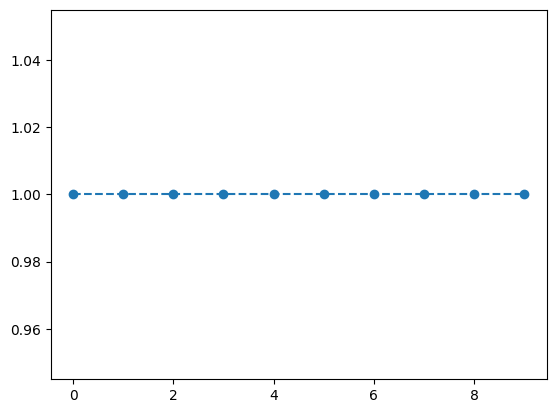

In [112]:
plt.plot(b,'--o') # 꼬리표가 없는 텐서는 그림이 잘 그려짐

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

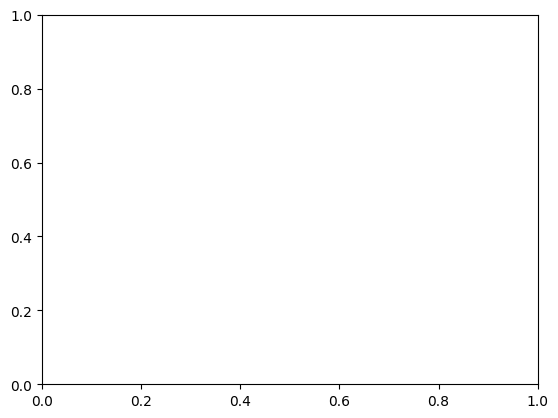

In [114]:
plt.plot(b*a,'--o') # 꼬리표가 있는 텐서는 그림을 그릴 시 에러 발생

`b(꼬리표X)`는 `plt.plot`이 동작하지만 `a*b(꼬리표O)`는 `plt.plot`이 동작하지 않음



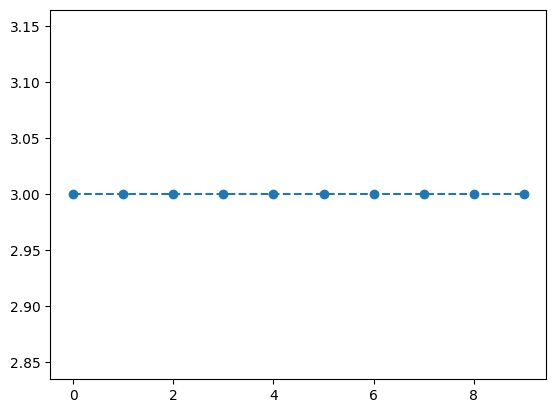

In [115]:
plt.plot(b*a.detach(),'--o') # 이런 식으로 바꾸면 그림이 그려짐. `b*a의 꼬리표 제거`

## 예제2) 미분 꼬리표 제거 방법2

In [116]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

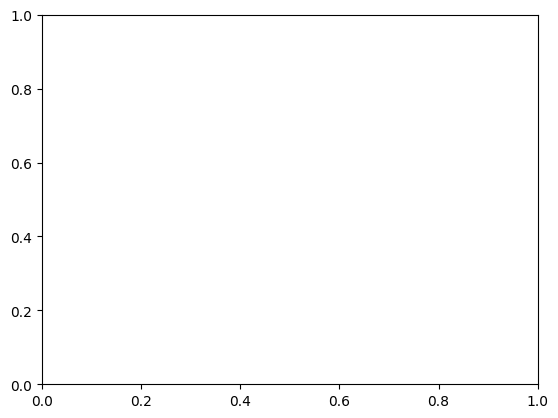

In [117]:
plt.plot(a*b.detach(),'--o')

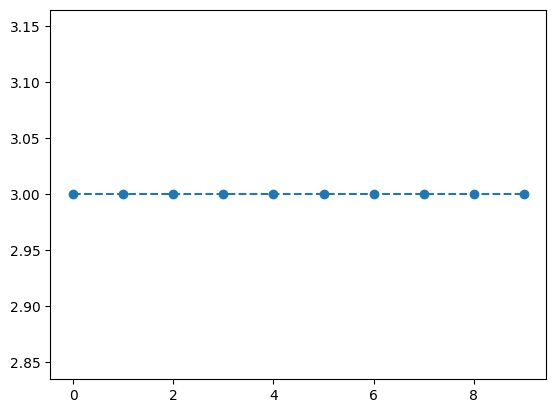

In [118]:
plt.plot((a*b).detach(),'--o')

$⇑$ 괄호 더 씌우기를 이용해 코딩을 했었어야 했다........!

섬세하게...!

**나 섬세하게 코딩하기 싫어**

In [119]:
torch.is_grad_enabled() # 꼬리표를 계산하는 모드..

True

`True` 라서 꼬리표 계산 모드 켜져있음

In [120]:
torch.set_grad_enabled(False)

`False` 로 설정했지롱

In [121]:
torch.is_grad_enabled() # 꼬리표를 계산하는 모드..

False

In [122]:
a,b

(tensor(3., requires_grad=True),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [123]:
a*b

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

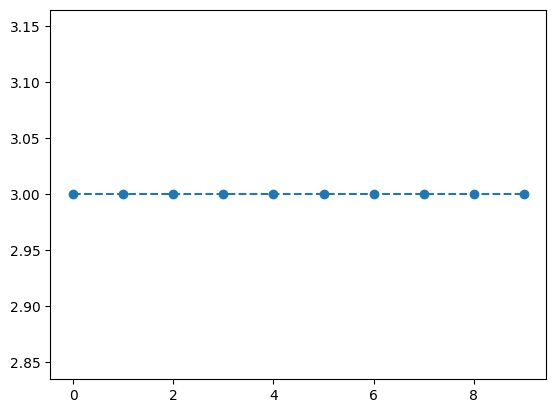

In [124]:
plt.plot(a*b,'--o')

In [125]:
torch.set_grad_enabled(True)

다시 `True` 로 변경

In [126]:
torch.is_grad_enabled() # 꼬리표를 계산하는 모드..

True

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

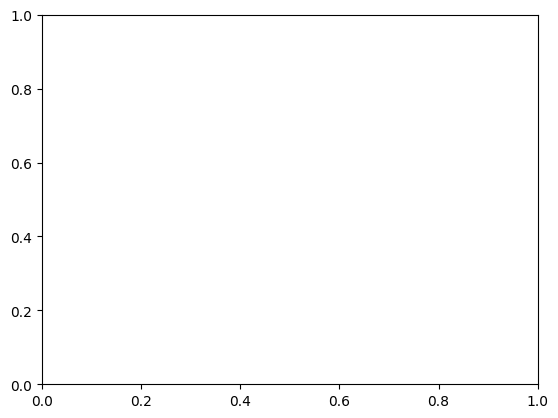

In [127]:
plt.plot(a*b)

다시 못 그리게되,

## 예제3) 미분 꼬리표 제거 방법3

In [128]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=tensor(0.8232, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0499,  0.1952]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [130]:
mp2024pkg.show_list(
    list(model.parameters())
)
# detach를 일일이 적용하기에는 너무 힘들 듯

Level 1 - Type: list, Length: 104, Content: [Parameter containing:
te ... 0.], requires_grad=True)]
     Level 2 - Type: Parameter, Length: 30522, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 512, Content: Parameter containing:
ten ... 02]], requires_grad=True)
     ...
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ... 008], requires_grad=True)
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ... -02], requires_grad=True)
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 2, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 2, Content: Parameter containing:
ten ...  0.], requires_grad=True)


In [131]:
torch.set_grad_enabled(False)

In [136]:
model(**model_input) # 꼬리표가 제거된 출력 결과

SequenceClassifierOutput(loss=tensor(0.8232, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0499,  0.1952]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [133]:
torch.set_grad_enabled(True) # 다시 꼬리표를 계산하는 모드로..

In [135]:
model(**model_input)  # 꼬리표가 제거되지 않은 출력 결과

SequenceClassifierOutput(loss=tensor(0.8232, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0499,  0.1952]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)